In [1]:
%matplotlib inline
from modelclass import *
import itertools as it

Comparing against data (PDG \`16 and CMS \`19), not accounting for the top quark threshold

In [24]:
CMS16 = pd.read_csv('./data/alpha_s_CMS16.csv', names = ['mu', 'alpha_s'])
PDG19 = pd.read_csv('./data/alpha_s_PDG19.csv', names = ['mu', 'alpha_s'])

In [25]:
Nd = 3

n_dq = 1

n_fermion = np.array([
    [0,1,0,0,0],
    [6,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [26]:
IR_evol_s_logmu = MC.EFT6.coupling_evolution([cn.alpha_s_MZ, 0], cn.MZ, 2000)

Integrating w.r.t $\mu$, not $\log\mu$

In [27]:
mu_initial = cn.MZ
mu_final = 2000
IR_evol_s_mu = solve_ivp(lambda mu, alphas: MC.EFT6.betas(alphas)/mu, [mu_initial, mu_final], [cn.alpha_s_MZ, 0])

Getting the evolution for more finely grained mu

In [28]:
mus = np.logspace(1, np.log10(2000), 100)
alpha_ss = [MC.EFT6.coupling_evolution([cn.alpha_s_MZ, 0], cn.MZ, mu).y[0][-1] for mu in mus]

Text(0, 0.5, '$\\alpha_s$')

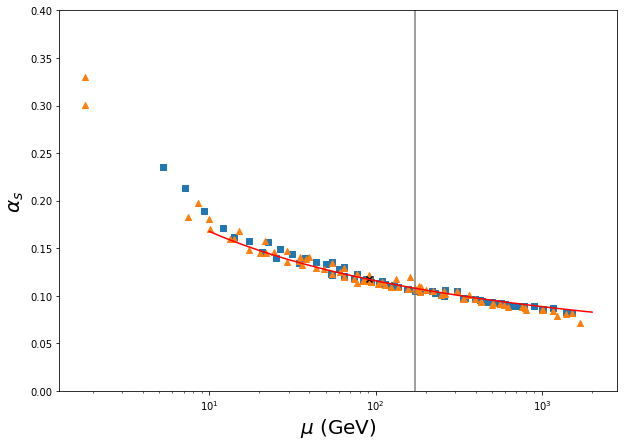

In [29]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(CMS16.mu, CMS16.alpha_s, marker='s')
ax.scatter(PDG19.mu, PDG19.alpha_s, marker='^')
ax.scatter(cn.MZ, cn.alpha_s_MZ, marker='x', color='k')

# ax.plot(np.exp(IR_evol_s_logmu.t), IR_evol_s_logmu.y[0], c='g')
# ax.plot(IR_evol_s_mu.t, IR_evol_s_mu.y[0], c='r')
ax.plot(mus, alpha_ss, c='r')

ax.vlines(173, 0, 1, 'gray')

ax.set_xscale('log')
# ax.set_xlim(90, 2000)
ax.set_ylim(0, 0.4)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=20)
ax.set_ylabel(r'$\alpha_s$', fontsize=20)

Text(0, 0.5, '$\\alpha_s^{-1}$')

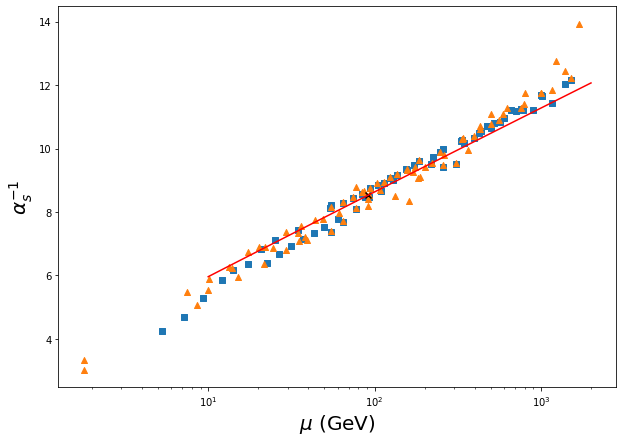

In [30]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(CMS16.mu, 1/CMS16.alpha_s, marker='s')
ax.scatter(PDG19.mu, 1/PDG19.alpha_s, marker='^')
ax.scatter(cn.MZ, 1/cn.alpha_s_MZ, marker='x', color='k')

ax.plot(mus, [1/alpha_s for alpha_s in alpha_ss], c='r')

# ax.vlines(173, 0, 1, 'gray')

ax.set_xscale('log')
# ax.set_xlim(90, 2000)
# ax.set_ylim(0, 0.4)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=20)
ax.set_ylabel(r'$\alpha_s^{-1}$', fontsize=20)

Here I checked the running of the inverse couplings, but found no difference

In [31]:
Nd = 3

n_dq = 1

n_fermion = np.array([
    [0,1,0,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [32]:
inv_evol = MC.UV.inv_coupling_evolution((1/0.3,1/0.3), cn.mu_UV, 1e3)

AttributeError: 'SubModel' object has no attribute 'inv_coupling_evolution'

In [33]:
evol = MC.UV.coupling_evolution((0.3, 0.3), cn.mu_UV, 1e3)

In [12]:
IR_evol = MC.EFT.inv_coupling_evolution((1/cn.alpha_s_MZ, 1), cn.MZ, 2000)

Text(0, 0.5, '$\\alpha_s^{-1}$')

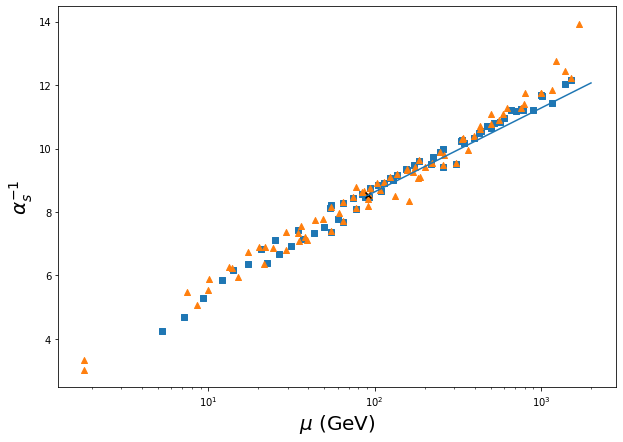

In [13]:
fig, ax = plt.subplots(figsize=(10,7))

ax.scatter(CMS16.mu, 1/CMS16.alpha_s, marker='s')
ax.scatter(PDG19.mu, 1/PDG19.alpha_s, marker='^')
ax.scatter(cn.MZ, 1/cn.alpha_s_MZ, marker='x', color='k')

# ax.plot(mus, [1/alpha_s for alpha_s in alpha_ss], c='r')
ax.plot(np.exp(IR_evol.t), IR_evol.y[0])

# ax.vlines(173, 0, 1, 'gray')

ax.set_xscale('log')
# ax.set_xlim(90, 2000)
# ax.set_ylim(0, 0.4)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=20)
ax.set_ylabel(r'$\alpha_s^{-1}$', fontsize=20)

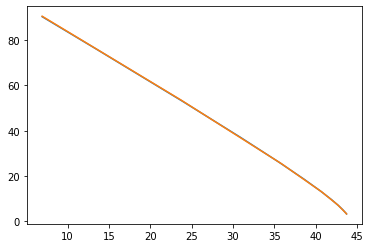

In [14]:
fig, ax = plt.subplots()

ax.plot(evol.t, 1/evol.y[0])
ax.plot(inv_evol.t, inv_evol.y[0])

# SUSY

These equations are from hep-ph/0207235

In [34]:
CA = 3
CF = 4/3
TF = 1/2

nq = 1
nsq = 0
ngl = 0

b1 = (11/3 - 2/3*ngl)*CA - (4/3*nq + 1/3*nsq)*TF
b2 = (34/3 - 16/3*ngl)*CA**2 - (4*nq + 4*nsq - 2*ngl*nsq)*CF*TF - (20/3*nq + 2/3*nsq - 2*ngl*nsq)*CA*TF

# New code for SUSY running

These are the precoeffs for the case that doesn't involve SUSY

In [21]:
def get_precoeffs(Nd):
    vis_irreps = cn.SUN_irreps[3]
    dark_irreps = cn.SUN_irreps[Nd]

    Ag = -(11/3)*cn.Nc/(2*np.pi)
    Bg = -(34/3)*cn.Nc**2/(8*np.pi**2)
    Cg = 0
    Dg = -(11/3)*Nd/(2*np.pi)
    Eg = -(34/3)*Nd**2/(8*np.pi**2)
    Fg = 0
    
    gluon_coeffs = [Ag, Bg, Cg, Dg, Eg, Fg]
    
    fermion_precoeffs = [np.zeros((5,5)) for _ in range(6)]
    scalar_precoeffs = [np.zeros((5,5)) for _ in range(6)]
    
    Af, Bf, Cf, Df, Ef, Ff = fermion_precoeffs
    As, Bs, Cs, Ds, Es, Fs = scalar_precoeffs
    
    for vis_idx in range(5):
        for dark_idx in range(5):
            d1, T1 = vis_irreps[vis_idx]
            C1 = (cn.Nc**2 - 1)*T1/d1
            d2, T2 = dark_irreps[dark_idx]
            C2 = (Nd**2 - 1)*T2/d2
            
            Af[vis_idx][dark_idx] += (2/3)*T1*2*d2/(2*np.pi)
            Bf[vis_idx][dark_idx] += ((10/3)*cn.Nc + 2*C1)*T1*2*d2/(8*np.pi**2)
            Cf[vis_idx][dark_idx] += 2*C2*T1*2*d2/(8*np.pi**2)
            Df[vis_idx][dark_idx] += (2/3)*T2*2*d1/(2*np.pi)
            Ef[vis_idx][dark_idx] += ((10/3)*Nd + 2*C2)*T2*2*d1/(8*np.pi**2)
            Ff[vis_idx][dark_idx] += 2*C1*T2*2*d1/(8*np.pi**2)
            
            As[vis_idx][dark_idx] += (1/3)*T1*d2/(2*np.pi)
            Bs[vis_idx][dark_idx] += ((2/3)*cn.Nc + 4*C1)*T1*d2/(8*np.pi**2)
            Cs[vis_idx][dark_idx] += 4*C2*T1*d2/(8*np.pi**2)
            Ds[vis_idx][dark_idx] += (1/3)*T2*d1/(2*np.pi)
            Es[vis_idx][dark_idx] += ((2/3)*Nd + 4*C2)*T2*d1/(8*np.pi**2)
            Fs[vis_idx][dark_idx] += 4*C1*T2*d1/(8*np.pi**2)
            
    return (fermion_precoeffs, scalar_precoeffs, gluon_coeffs)

For SUSY, since fermions and scalars live together in chiral supermultiplets, I can just have one multiplicity for each combination of representations. Then I could just use the other form of the coupling constants from Jones - but need to work out what is happening with the terms that also involve the number of gluinos.

Update: I think the gluino+squark terms are fine, and I can just use the form of the beta functions from Jones

In [22]:
def get_SUSY_precoeffs(Nd):
    vis_irreps = cn.SUN_irreps[3]
    dark_irreps = cn.SUN_irreps[Nd]

    Ag = -3*cn.Nc/(2*np.pi)
    Bg = -6*cn.Nc**2/(8*np.pi**2)
    Cg = 0
    Dg = -3*Nd/(2*np.pi)
    Eg = -6*Nd**2/(8*np.pi**2)
    Fg = 0
    
    gluon_coeffs = [Ag, Bg, Cg, Dg, Eg, Fg]
    
    multiplet_precoeffs = [np.zeros((5,5)) for _ in range(6)]
    
    Am, Bm, Cm, Dm, Em, Fm = multiplet_precoeffs
    
    for vis_idx in range(5):
        for dark_idx in range(5):
            d1, T1 = vis_irreps[vis_idx]
            C1 = (cn.Nc**2 - 1)*T1/d1
            d2, T2 = dark_irreps[dark_idx]
            C2 = (Nd**2 - 1)*T2/d2
            
            Am[vis_idx][dark_idx] += T1*d2/(2*np.pi)
            Bm[vis_idx][dark_idx] += (2*cn.Nc + 4*C1)*T1*d2/(8*np.pi**2)
            Cm[vis_idx][dark_idx] += 4*C2*T1*d2/(8*np.pi**2)
            Dm[vis_idx][dark_idx] += T2*d1/(2*np.pi)
            Em[vis_idx][dark_idx] += (2*Nd + 4*C2)*T2*d1/(8*np.pi**2)
            Fm[vis_idx][dark_idx] += 4*C1*T2*d1/(8*np.pi**2)
            
    return (multiplet_precoeffs, gluon_coeffs)

In [5]:
pc_SUSY_Nd = {}

for Nd in [2,3,4]:
    with open(f'precoeffs/pc_SUSY_{Nd}', 'rb') as fp:
        pc = pkl.load(fp)
        pc_SUSY_Nd[Nd] = pc

In [38]:
n_multiplet = np.array([
    [0,0,1,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 1

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

n_fermion = np.array([
    [0,0,1,0,0],
    [6,0,0,0,0],
    [0,0,1,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_scalar = np.array([
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,2,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

MC = ModelClass(n_fermion, n_scalar, n_dq, Nd)

In [39]:
alphas_UV = [0.3, 0.3]

MSUSY = 5000

SEFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = SEFT5_evol_s.y[0][-1]
SEFT6_evol_s = SMC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, MSUSY)
alpha_s_MSUSY = SEFT6_evol_s.y[0][-1]
SUSY_evol_s = SMC.SUSY.coupling_evolution((alpha_s_MSUSY, 0), MSUSY, cn.mu_UV)

SUV_evol = SMC.UV.coupling_evolution(alphas_UV, cn.mu_UV, 1e10)

EFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = EFT5_evol_s.y[0][-1]
EFT6_evol_s = SMC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, cn.mu_UV)

UV_evol = MC.UV.coupling_evolution(alphas_UV, cn.mu_UV, 1e10)

Text(0, 0.5, '$\\alpha_s$')

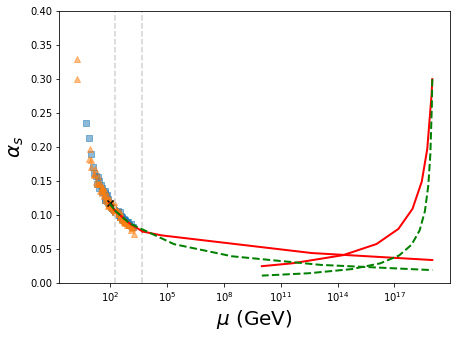

In [40]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(CMS16.mu, CMS16.alpha_s, marker='s', alpha=0.5)
ax.scatter(PDG19.mu, PDG19.alpha_s, marker='^', alpha=0.5)
ax.scatter(cn.MZ, cn.alpha_s_MZ, marker='x', color='k')

ax.plot(np.exp(SEFT5_evol_s.t), SEFT5_evol_s.y[0], 'r', linewidth=2)
ax.plot(np.exp(SEFT6_evol_s.t), SEFT6_evol_s.y[0], 'r', linewidth=2)
ax.plot(np.exp(SUSY_evol_s.t), SUSY_evol_s.y[0], 'r', linewidth=2)
ax.plot(np.exp(SUV_evol.t), SUV_evol.y[0], 'r', linewidth=2)

ax.plot(np.exp(EFT5_evol_s.t), EFT5_evol_s.y[0], 'g--', linewidth=2)
ax.plot(np.exp(EFT6_evol_s.t), EFT6_evol_s.y[0], 'g--', linewidth=2)
ax.plot(np.exp(UV_evol.t), UV_evol.y[0], 'g--', linewidth=2)

ax.vlines([cn.mt, MSUSY], 0, 0.4, 'lightgray', '--')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0, 0.4)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=20)
ax.set_ylabel(r'$\alpha_s$', fontsize=20)

In [41]:
f'{MC.Lambda_dQCD_M(alphas_UV)[1]:.2e}', f'{SMC.Lambda_dQCD_M(alphas_UV)[1]:.2e}'

('2.21e+15', '1.90e+14')

Text(0, 0.5, '$\\alpha_s^{-1}$')

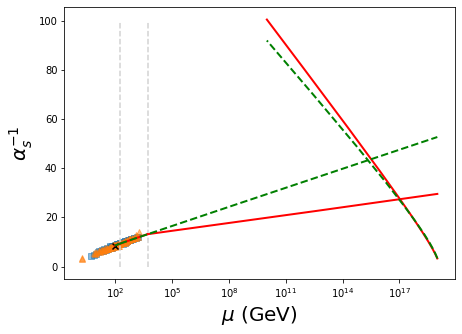

In [21]:
fig, ax = plt.subplots(figsize=(7,5))

ax.scatter(CMS16.mu, 1/CMS16.alpha_s, marker='s', alpha=0.5)
ax.scatter(PDG19.mu, 1/PDG19.alpha_s, marker='^', alpha=0.5)
ax.scatter(cn.MZ, 1/cn.alpha_s_MZ, marker='x', color='k')

ax.plot(np.exp(SEFT5_evol_s.t), 1/SEFT5_evol_s.y[0], 'r', linewidth=2)
ax.plot(np.exp(SEFT6_evol_s.t), 1/SEFT6_evol_s.y[0], 'r', linewidth=2)
ax.plot(np.exp(SUSY_evol_s.t), 1/SUSY_evol_s.y[0], 'r', linewidth=2)
ax.plot(np.exp(SUV_evol.t), 1/SUV_evol.y[0], 'r', linewidth=2)

ax.plot(np.exp(EFT5_evol_s.t), 1/EFT5_evol_s.y[0], 'g--', linewidth=2)
ax.plot(np.exp(EFT6_evol_s.t), 1/EFT6_evol_s.y[0], 'g--', linewidth=2)
ax.plot(np.exp(UV_evol.t), 1/UV_evol.y[0], 'g--', linewidth=2)

ax.vlines([cn.mt, cn.MSUSY], 0, 100, 'lightgray', '--')

ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(0, 0.4)

ax.set_xlabel(r'$\mu$ (GeV)', fontsize=20)
ax.set_ylabel(r'$\alpha_s^{-1}$', fontsize=20)

In [23]:
M = brentq(fn_for_M, cn.mt, cn.mu_UV)
MS = brentq(fn_for_M_SUSY, cn.mt, cn.mu_UV)
f'M: {M:.2e}, M (with MSUSY = 5 TeV): {MS:.2e}'

'M: 2.21e+15, M (with MSUSY = 5 TeV): 1.07e+17'

### Getting epsilon_v for a model

In [40]:
MSUSY = 5000

n_multiplet = np.array([
    [0,0,6,0,0],
    [12,2,0,0,0],
    [0,0,4,0,0],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

n_dq = 3

Nd = 3

SMC = SUSYModelClass(n_multiplet, n_dq, Nd)

In [41]:
def alphas_UV(LdQCD, M):
    EFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_mt, 0), cn.MZ, cn.mt)
    alpha_s_mt = EFT5_evol_s.y[0][-1]
    EFT6_evol_s = SMC.EFT6.coupling_evolution((cn.alpha_s_mt, 0), cn.mt, MSUSY)
    alpha_s_MSUSY = EFT6_evol_s.y[0][-1]
    EFT5_evol_d = SMC.EFT5.coupling_evolution((0, SMC.CJT_bound), LdQCD, MSUSY)
    alpha_d_MSUSY = EFT5_evol_d.y[1][-1]
    SUSY_evol = SMC.SUSY.coupling_evolution((alpha_s_MSUSY, alpha_d_MSUSY), MSUSY, M)
    
    alpha_s_0 = SUSY_evol.y[0][-1]
    alpha_d_0 = SUSY_evol.y[1][-1]

    UV_evol = SMC.UV.coupling_evolution((alpha_s_0, alpha_d_0), M, cn.mu_UV)

    return UV_evol
        
def _M_bounds_finite_aUV(LdQCD):
    f = lambda M: alphas_UV(LdQCD, M).t[-1] - np.log(cn.mu_UV) + 1e-5

    fmin = f(MSUSY)

    if fmin > 0:
        return (MSUSY, cn.mu_UV)

    M_min_0 = brentq(f, MSUSY, cn.mu_UV)

    for i in range(5):
        M_min = M_min_0*(1 + 10**(-5+i))
        if f(M_min) == 1e-5:
            return (M_min, cn.mu_UV)

    return (M_min, cn.mu_UV)


def _M_bounds_pert_aUV(LdQCD):
    M_min_0, M_max_0 = _M_bounds_finite_aUV(LdQCD)

    f = lambda M: max(alphas_UV(LdQCD, M).y.T[-1]) - 0.3

    fmin = f(M_min_0)

    if fmin < 0:
        return (M_min_0, M_max_0)

    M_min = brentq(f, M_min_0, M_max_0)

    return(M_min, M_max_0)        

def _M_values(M_min, M_max):
    n_points = 99
    M_values = np.ones(n_points)*M_min + np.logspace(np.log10(M_min)-3, np.log10(M_max - M_min), n_points)
    np.insert(M_values, 0, M_min)
    return M_values

def alphas_UV_contour(LdQCD):
    M_min, M_max = _M_bounds_pert_aUV(LdQCD)

    M_values = _M_values(M_min, M_max)

    aUV_contour = np.array([alphas_UV(LdQCD, M).y.T[-1] for M in M_values])

    return aUV_contour

def epsilon_v():
    c_low = alphas_UV_contour(0.2)
    c_high = alphas_UV_contour(5)

    if np.argmax(c_low[0]) == np.argmax(c_high[0]):
        c_total = np.concatenate((c_low, np.flip(c_high, axis=0)))
    else:
        c_total = np.concatenate((c_low, np.flip(c_high, axis=0), 0.3*np.ones((1,2))))

    valid_region = Polygon(c_total)

    epsilon_v = valid_region.area/0.3**2

    return epsilon_v

In [42]:
clow = alphas_UV_contour(0.2)
chigh = alphas_UV_contour(5)
eps_v = epsilon_v()

(0.0, 0.3)

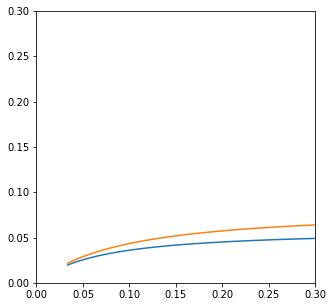

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

ax.plot(*clow.T)
ax.plot(*chigh.T)

ax.set_xlim(0, 0.3)
ax.set_ylim(0, 0.3)

In [14]:
SEFT5_evol_s = SMC.EFT5.coupling_evolution((cn.alpha_s_MZ, 0), cn.MZ, cn.mt)
alpha_s_mt = SEFT5_evol_s.y[0][-1]
SEFT6_evol_s = SMC.EFT6.coupling_evolution((alpha_s_mt, 0), cn.mt, MSUSY)
alpha_s_MSUSY = SEFT6_evol_s.y[0][-1]
SUSY_evol_s = SMC.SUSY.coupling_evolution((alpha_s_MSUSY, 0), MSUSY, cn.mu_UV)

In [15]:
asM = SUSY_evol_s.y[0][-1]

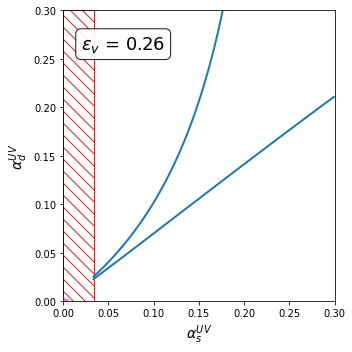

In [425]:
fig, ax = plt.subplots(figsize = (5,5))

line_styles = ['--', '-', '-.']
M_colour = 'C3'
L_colour='C0'

ax.fill_betweenx([0, 0.3], 0, [asM, asM], facecolor='none', edgecolor=M_colour, hatch=r'\\')

# ax.plot(find_alpha_s_contour(model, a_idx, M_idx), alpha_d_contour, color=M_colour, alpha=0.3)


ax.plot(*clow.T, L_colour, linewidth=2)
ax.plot(*chigh.T, L_colour, linewidth=2)

ax.plot(*(0,0), 'C6*', markersize=10)

ax.text(0.02, 0.26, r'$\epsilon_v$' + f' = {eps_v:.2f}', fontsize=18, bbox=dict(fc='white', boxstyle='round', alpha=0.9))


ax.set_xlim([0,0.3])
ax.set_ylim([0,0.3])
ax.set_xlabel(r'$\alpha_s^{UV}$', fontsize=14)
ax.set_ylabel(r'$\alpha_d^{UV}$', fontsize=14)
    
plt.tight_layout()

plt.savefig('../plots/SUSY_eps_v.pdf')

In [59]:
x0, y0 = 1, 1

while x0 < 2e9:
    x = 3*x0 + 4*y0
    y = 3*y0 + 2*x0
    
    P = (x+1)/2
    B = (y+1)/2
    
    print(f'Population: {int(P)}, Inedible: {int(B)}, {100*B/P:.2f}% inedile')
    
    x0, y0 = x, y

Population: 4, Inedible: 3, 75.00% inedile
Population: 21, Inedible: 15, 71.43% inedile
Population: 120, Inedible: 85, 70.83% inedile
Population: 697, Inedible: 493, 70.73% inedile
Population: 4060, Inedible: 2871, 70.71% inedile
Population: 23661, Inedible: 16731, 70.71% inedile
Population: 137904, Inedible: 97513, 70.71% inedile
Population: 803761, Inedible: 568345, 70.71% inedile
Population: 4684660, Inedible: 3312555, 70.71% inedile
Population: 27304197, Inedible: 19306983, 70.71% inedile
Population: 159140520, Inedible: 112529341, 70.71% inedile
Population: 927538921, Inedible: 655869061, 70.71% inedile
Population: 5406093004, Inedible: 3822685023, 70.71% inedile
